In [13]:
######### Generate Derivative exercises for practice and plotting ########

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# generate random polynomial functions

x = sym.symbols('x')

polyOrder = np.random.randint(1,5) # random polynomial order up to 4th order

# list of transcendental functions we will combine - cos sin natural log natural exponent
funList = [ sym.cos(x), sym.sin(x), sym.log(x), sym.exp(x) ]

fx = 0
for i in range(polyOrder):
    # form: ax**i - some coefficient with the order of the polynomial
    fx += np.random.randint(-5,6)*x**i

# select a random function
for f in np.random.choice(funList, 2, replace=False): # pass in replace=False to sample uniquely - will not replace the chosen item back into the list so we get another one
    # add on the transcendental function to our generated exercise equation
    # make the sign random
    fx += np.random.choice((-1,1)) * f # randomly change sign of this part by selecting randomly from a population of -1 or +1 multiplier

# show a random function you can differentiate as an exercise that incorporates polynomials and transcendental functions
display(fx)


2*x**3 + 2*x**2 + 5*x + sin(x) - cos(x) - 5

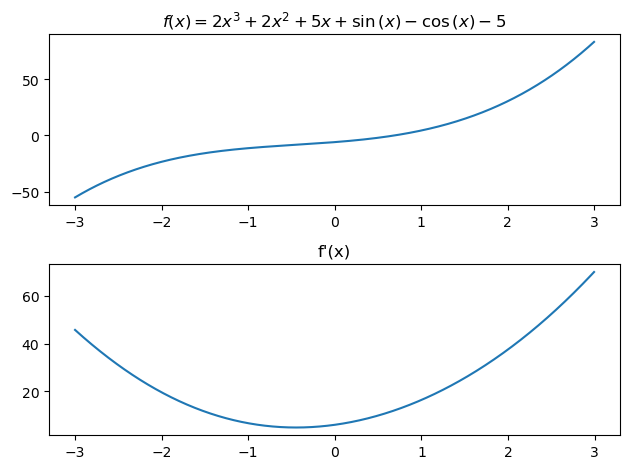

The derivative of the function:


6*x**2 + 4*x + sin(x) + cos(x) + 5

In [15]:
# More exercises using numpy lambdify

# domain
D = [ -3,3 ]

# fix the warning about negative numbers if they are included with log functions
domain = sym.calculus.util.continuous_domain(fx,x,sym.S.Reals)
if domain.start == 0:
    D[0] = .1 # redefine 0s to fix the warning about log and negative random nums generated

# convert the sympy function to numpy by passing in the variables and the function
fxfun = sym.lambdify(x,fx) # this is now not a symbolic expression

# we now need to set x values since the sympy expression has been converted to numpy
xx = np.linspace(D[0],D[1], 1000)
y = fxfun(xx)

dx = np.diff(xx)[0] # how much each successive x increases
dy = np.diff(y) / dx # this gives us an estimate of the derivative of the function

# the first returned item in the tuple from subplots is the figure which we don't need, we want the plots in axs
_,axs = plt.subplots(2,1)
axs[0].plot(xx,y)
axs[0].set_title(f'$f(x) = {sym.latex(fx)}$')

axs[1].plot(xx[:-1],dy) # go up to the penultimate point so the lengths of x inputs and the np.diff result match (will add one element due to its logic)
axs[1].set_title("f'(x)")

plt.tight_layout()
plt.show()

# get the derivative of the function generated
print('The derivative of the function:')
display(sym.diff(fx)) # use the original sympy function, not the lambdified one


